# Структура таблиц

## Широкие и длинные таблицы

Одни и те же данные можно структурировать по разному.

Как? Зависит от задачи..

### Широкие таблицы

По колонкам - варианты одного фактора, по строчкам - варианты второго фактора. 
Если нужен третий фактор - повторяем всю табличку.

- удобны для внесения данных
- соответствуют итоговому рисунку, где сопоставляются изменения средних от двух факторов

### Длинные таблицы

набор данных преобразуется в виде матрицы размером `[n_samples, n_features]`: 

-  **n_samples**: Количество объектов (образцов, samples). Образцом может быть документ, изображение, звуко- или видеозапись, одно измерение прибора, обследование одного пациента, один образец живой ткани или что-то, что можно описать фиксированным набором количественных характеристик.
-  **n_features**: Количество характеристик (показателей, признаков, отличительных черт, features), которые могут быть использованы для количественного описания объекта. Количественные характеристики - это те, которые выражают числами с плавающей запятой. Значения типа категорий или да/нет также приводят к числовому выражению.

### Готовая для анализа таблица (Tidy Table)

Это таблица длинного формата:
1. Каждая переменная формирует колонку.
2. Каждое наблюдение формирует строку.
3. Каждый тип наблюдений формирует таблицу.

Дополнительные требования:
1. Нет пропусков, ошибочных значений.
2. Сбалансированное количество наблюдений с альтернативными значениями факторов.
3. Наблюдения в строках логически упорядочены.

## Визуализация отношений между характеристиками

В библиотеках `pandas` и `seaborn` включены инструменты для визуализации соотношений между разными характеристиками набора данных.

`sns.pairplot()` позволяет попарно сопоставить значения нескольких показатели между собой, при этом раскрасить точки разными цветами по категориальному признаку.

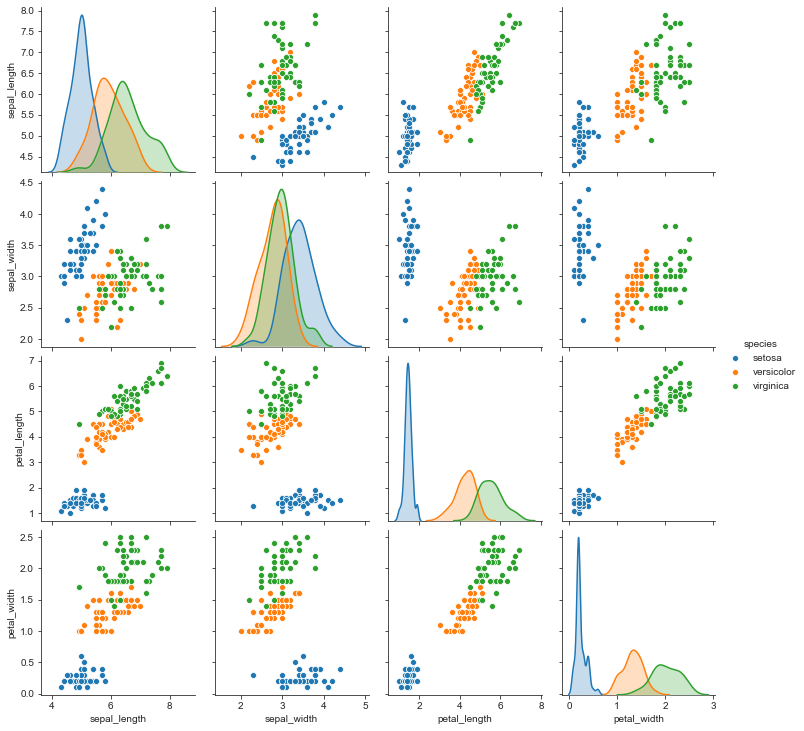

In [5]:
sns.set_style('ticks')
D = sns.load_dataset('iris')
sns.pairplot(D, hue="species", height=2.5);

Если представить все измерения в ряд, и соединить *паралелльные координаты* линиями, то объекты, входящие в кластер, выглядят ближе к друг другу.

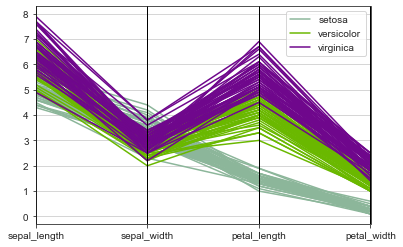

In [7]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(D, 'species');

*Кривые Эндрюса* (Andrews curves) позволяют представить многомерные данные в виде большого числа кривых, которые синтезируются как сигналы, восстановленные из разложения Фурье, спектральные коэффициенты которого берутся из данных. При окраске этих кривых в разные цвета можно визуализировать кластеризацию данных.

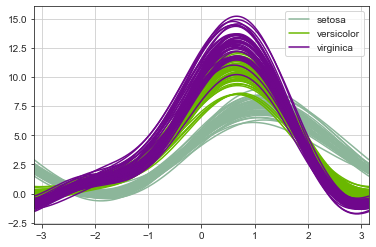

In [8]:
from pandas.plotting import andrews_curves
andrews_curves(D, 'species');

RadViz - еще один алгоритм для визуализации многомерных данных, основанный на метафоре минимизации натяжения струн.
Если измерения представить как опорные точки на плоскости, а отдельные объекты как разноцветные шарики, соединненные с опорными точками резиночками, жесткость которых пропорциональна числовым значениям в данных измерениях, то на рисунке образцы будут отображены в позициях равновесия.

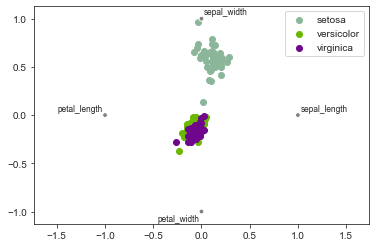

In [15]:
from pandas.plotting import radviz
radviz(D, 'species');

Подобные нестандартные представления данных помогают выдвинуть гипотезу о структуре данных, которую уже можно проверить стандартными статистическими методами.

:::{seealso}

Когда у вас есть готовая таблица, и вы еще не знаете, какой анализ уместнее провести, поможет *графическое исследование данных* (*Data exploration*, разведка данных).

1. Откройте приложение [Data Voyager](https://vega.github.io/voyager/)
1. Выберите набор данных Iris
1. Перетащите название колонки species на поле `colour` (цвет), а одну из колонок размера - на поле `x`.

Vega - это декларативный формат для создания и публикации визуализаций. Визуализации в Vega описываются в формате JSON, из которых создаются интерактивные представления в HTML5 Canvas или SVG.

Ссылки

- [Vega](https://vega.github.io/) - декларативные графики онлайн
- [Altair](https://altair-viz.github.io/) - декларативные графики на Python

:::